In [7]:
import tensorflow as tf
from keras.datasets import cifar100
from tensorflow.keras.layers import Input, Conv2D, Dropout, MaxPooling2D, Flatten, Dense,AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [8]:
#Load dataset
(X_c_train, y_c_train), (X_c_test, y_c_test) = cifar100.load_data(label_mode='coarse')
(X_f_train, y_f_train), (X_f_test, y_f_test) = cifar100.load_data(label_mode='fine')

X_train = X_c_train
X_test = X_c_test
y_train = [y_c_train, y_f_train]
y_test = [y_c_test, y_f_test]

image_size = X_train[0].shape

num_classes_c = len(set([v[0] for v in y_c_train]))
num_classes_f = len(set([v[0] for v in y_f_train]))


In [9]:
def get_model1():
    # Conv base
    in_layer = Input(shape=image_size, dtype='float32', name='main_input')
    conv_base = keras.applications.VGG19(
        include_top=False,
        weights="imagenet")(in_layer)
    conv_base = Flatten()(conv_base)
    # coarse output
    out_c = Dense(num_classes_c, activation="softmax", name='out_c')(conv_base)
    # fine output 
    #out_f = Dense(num_classes_f, activation="softmax", name='out_f')(conv_base)
    out_f = Dense(num_classes_f, activation="softmax", name='out_f')(out_c)
    # Build the model
    model = Model(
            inputs=in_layer,
            outputs=[out_c, out_f])
    loss = keras.losses.SparseCategoricalCrossentropy()
    optimizer = keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(optimizer=optimizer, 
                  loss=[loss, loss],
                  loss_weights=[0.5, 0.5],
                  metrics=['accuracy'])
    return model


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg19 (Model)                multiple                  20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
out_c (Dense)                (None, 20)                10260     
_________________________________________________________________
out_f (Dense)                (None, 100)               2100      
Total params: 20,036,744
Trainable params: 20,036,744
Non-trainable params: 0
_________________________________________________________________


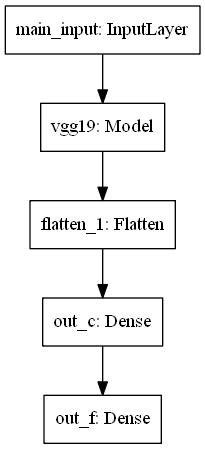

In [10]:
# Create the model
model = get_model1()
model.summary()
plot_model(model)

In [11]:
#train model
batch = 64
history = model.fit(X_train, 
                    y_train,
                    validation_data = (X_test, y_test), 
                    batch_size=batch, 
                    epochs=15)


Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 52s 1ms/sample - loss: 3.6492 - out_c_loss: 2.6885 - out_f_loss: 4.6085 - out_c_accuracy: 0.2793 - out_f_accuracy: 0.0142 - val_loss: 3.2107 - val_out_c_loss: 1.8120 - val_out_f_loss: 4.6100 - val_out_c_accuracy: 0.4379 - val_out_f_accuracy: 0.0169
Epoch 2/15
50000/50000 [==============================] - 54s 1ms/sample - loss: 3.0989 - out_c_loss: 1.5890 - out_f_loss: 4.6088 - out_c_accuracy: 0.5023 - out_f_accuracy: 0.0181 - val_loss: 3.0604 - val_out_c_loss: 1.5146 - val_out_f_loss: 4.6069 - val_out_c_accuracy: 0.5254 - val_out_f_accuracy: 0.0211
Epoch 3/15
50000/50000 [==============================] - 53s 1ms/sample - loss: 2.9716 - out_c_loss: 1.3389 - out_f_loss: 4.6046 - out_c_accuracy: 0.5748 - out_f_accuracy: 0.0222 - val_loss: 2.9749 - val_out_c_loss: 1.3481 - val_out_f_loss: 4.6011 - val_out_c_accuracy: 0.5698 - val_out_f_accuracy: 0.0231
Epoch 4/15
50000/50000 [=====

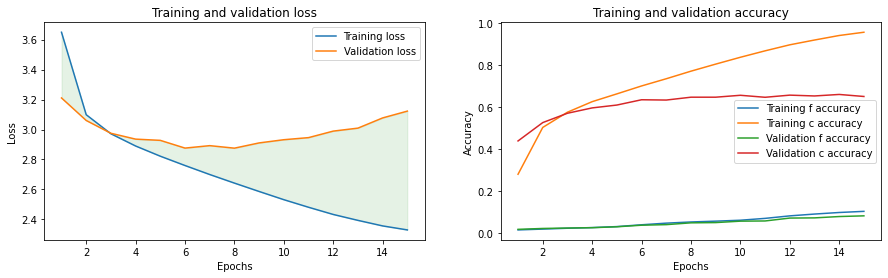

In [12]:
out_f_accuracy = history.history['out_f_accuracy']
out_c_accuracy = history.history['out_c_accuracy']
val_out_f_accuracy = history.history['val_out_f_accuracy']
val_out_c_accuracy = history.history['val_out_c_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, out_f_accuracy, label='Training f accuracy')
plt.plot(epochs, out_c_accuracy, label='Training c accuracy')
plt.plot(epochs, val_out_f_accuracy, label='Validation f accuracy')
plt.plot(epochs, val_out_c_accuracy, label='Validation c accuracy')
# plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()